In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

In [2]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100,1)

## Normal equations

In [3]:
X_b = np.c_[np.ones((100,1)), X] ## add x0 = 1 in each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.09947146],
       [2.96049615]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.09947146],
       [10.02046377]])

(0.0, 2.0, 0.0, 15.0)

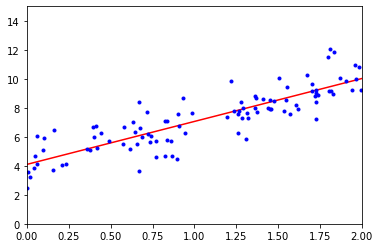

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.09947146]), array([[2.96049615]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.09947146],
       [10.02046377]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [12]:
theta_best_svd

array([[4.09947146],
       [2.96049615]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.09947146],
       [2.96049615]])

## Gradient Descent

In [14]:
eta = 0.3
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iterations in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [15]:
theta

array([[4.09947146],
       [2.96049615]])

## Stochastic gradient descent

In [16]:
n_epochs = 50
t0, t1 = 5, 50 #Hyperparameters of learning schedule

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients


In [17]:
theta

array([[4.02371597],
       [2.97855706]])

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08934558]), array([2.93559624]))

## Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [23]:
m = 100
X = 6*np.random.randn(m,1) - 3
y = 0.5*X**2 + X + 2 +np.random.randn(m,1)

In [24]:
X_poly = poly_features.fit_transform(X)

In [25]:
X_poly[0]

array([-6.42149453, 41.235592  ])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9967291]), array([[0.96964256, 0.49937372]]))

## Learning Curves

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b--', linewidth=3, label='val')
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')

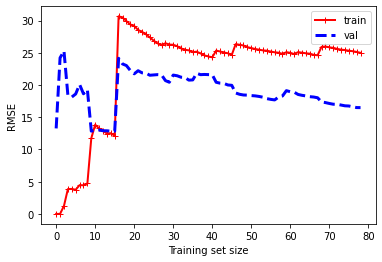

In [29]:
plot_learning_curves(LinearRegression(), X, y)

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

(0.0, 3.0)

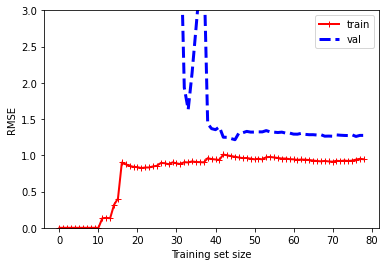

In [31]:
plot_learning_curves(polynomial_regression, X, y)
plt.ylim((0,3))

# Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

In [34]:
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [35]:
ridge_reg.predict([[1.5]])

array([[12.44475196]])

In [36]:
sgd_reg = SGDRegressor(penalty='l2', alpha=2)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.30897569])

# Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([12.45336275])

# Elastic Net

In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([12.45909197])

## Early Stopping

In [42]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [43]:
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [53]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

In [58]:
minimum_val_error = float('inf')
best_epoch = None
best_model = None

In [62]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [63]:
from sklearn import datasets

In [64]:
iris = datasets.load_iris()

In [71]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [79]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)

In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [102]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

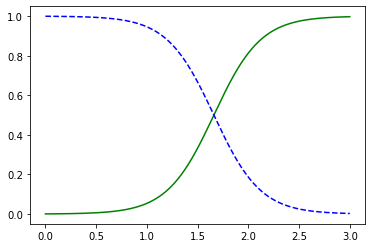

In [103]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')

## Softmax Regression

In [109]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [110]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [112]:
softmax_reg.predict([[5,2]])

array([2])

In [113]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])